# Informe Hito 2
### Grupo 3 - Proyecto mineros: Credit Card Transactions
#### Integrantes:
- Sofía Araya
- Bastián Araneda
- Ian Armstrong
- Alejandra Campos
- Felipe Cárdenas

---

El dataset escogido para el proyecto semestral se trata de transacciones con tarjetas de crédito generadas a partir de una simulación de un mundo virtual por IBM. Incluye más de 20 millones de transacciones realizadas por 2000 consumidores sintéticos que residen en los Estados Unidos y que viajan por el mundo. Las transacciones fueron realizadas entre los anios 2000 y 2020, e incluye múltiples tarjetas de crédito por consumidor, lo que permite su análisis en contextos como la detección de fraudes y el estudio de patrones de compra.

## Sobre los Datos Sintéticos

Por razones de privacidad y seguridad, existe una reducida cantidad datos bancarios reales disponibles para uso público, por lo que no hay suficientes disponibles para análisis y/o minería de éstos. Como solución a esto, un grupo de investigadores de IBM construyeron un modelo del mercado Estadounidense, con énfasis en las transacciones y comportamientos de personas indviduales, que genera datos cuyo comportamiento general corresponde a las estadísticas disponibles respecto a transacciones bancarias.

Es importante notar que a pesar de que el paper fué publicado durante 2019, no hay ninguna mención a la pandemia de COVID-19, por lo que probablemente no se incluyen sus efectos en los datos generados para 2019 ni 2020.

El paper que describe la generación de éstos datos se puede encontrar [aquí](https://arxiv.org/abs/1910.03033).

## Motivación

Actualmente, la mayoría de personas manejama nuestro dinero de manera virtual, y el uso de tarjetas de crédito y débito se ha popularizado enormemente en los últimos años. Este crecimiento lleva a pensar que, en un futuro no muy lejano, las transacciones bancarias serán completamente virtuales. Sin embargo, éste aumento también ha traído consigo un problema: el fraude financiero, que ha crecido a la par de estas transacciones.

Este proyecto busca entender mejor estos fraudes a través del análisis de datos de transacciones bancarias. El _dataset_ que se está trabajando abarca transacciones desde 1991 hasta 2020, con cerca de 24 millones de instancias diferentes.

Uno de los principales objetivos es poder predecir si una transacción dada es o no fraudulenta, con énfasis particular en las transacciones hechas en línea.

## Presentacion de los datos
El _dataset_ presenta sus datos distribuidos en 4 tablas:
- df_max: Todas las transacciones de credito con sus detalles (fecha, hora, monto, tipo, etc), de mas de 24 millones de filas
- df_min: extracto de la tabla df_max
- df_users: detalles de los 2000 usuarios de las tarjetas
- df_cards: tabla con las caracteristicas de cada tarjeta usada para las transacciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga de datos
df_cc = pd.read_csv('credit_card_transactions-ibm_v2.csv')
df_users = pd.read_csv('sd254_users.csv')
df_cards = pd.read_csv('sd254_cards.csv')
df_usercc = pd.read_csv("User0_credit_card_transactions.csv")
df_users["User"] = range(0, len(df_users)) # Crear columna User en df_users para index

In [3]:
#Limpieza de datos de Transacciones
df_cc['Amount'] = df_cc['Amount'].str.replace('$', '').astype(float) #dolares a float
df_cc['Hour'] = df_cc['Time'].str.split(':').str[0].astype(int)   #hora:min a hora int
df_cc.drop(columns=['Time'], inplace=True)
df_cc['Is Fraud?'] = df_cc["Is Fraud?"].map({"No": False, "Yes": True})
df_gigante = df_cc.merge(df_users, how="inner", on="User")   #merge de df_cc y df_users

## Analisis Estadistico (Hito 1)
A continuacion se presenta una tabla con resultados estadisticos sobre las transacciones, como el promedio, la media y la desviación estandar.

In [ ]:
df_cc.describe()

,User,Card,Year,Month,Day,Amount,Merchant Name,Zip,MCC
count,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.150876e+07,2.438690e+07
mean,1.001019e+03,1.351366e+00,2.011955e+03,6.525064e+00,1.571812e+01,4.363401e+01,-4.769230e+17,5.095644e+04,5.561171e+03
std,5.694612e+02,1.407154e+00,5.105921e+00,3.472355e+00,8.794073e+00,8.202239e+01,4.758940e+18,2.939707e+04,8.793154e+02
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,-5.000000e+02,-9.222899e+18,5.010000e+02,1.711000e+03
25%,5.100000e+02,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,9.200000e+00,-4.500543e+18,2.837400e+04,5.300000e+03
50%,1.006000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,3.014000e+01,-7.946765e+17,4.674200e+04,5.499000e+03
75%,1.477000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,6.506000e+01,3.189517e+18,7.756400e+04,5.812000e+03
max,1.999000e+03,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,1.239050e+04,9.223292e+18,9.992800e+04,9.402000e+03


Es importante notar que las transacciones fraudulentas (aproximadamente 30.000) corresponden a un porcentaje mínimo de las transacciones totales (alrededor de 24 millones), aproximadamente el 0,1%.

<Axes: title={'center': 'Porcentaje de Fraudes en transacciones'}>

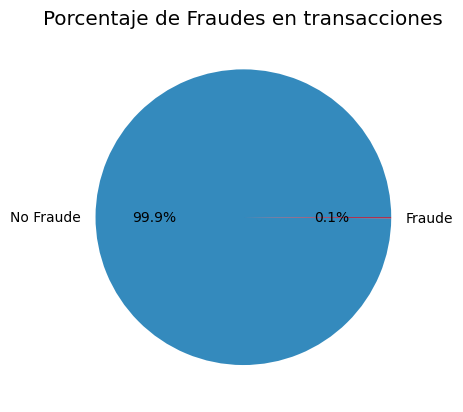

In [ ]:
count = df_cc["Is Fraud?"].value_counts()
count.index = count.index.map({True:"Fraude", False:"No Fraude"})
count.plot.pie(legend=False,ylabel="",title="Porcentaje de Fraudes en transacciones", autopct="%1.1f%%")

Si nos fijamos solamente en las transacciones online, el porcentaje de fraude es un poco mayor, y podría ser algo mas fácil solucionar algunos problemas en este contexto mas reducido, como puede ser el predecir fraudes.

<Axes: title={'center': 'Porcentaje de Fraudes en transacciones online'}>

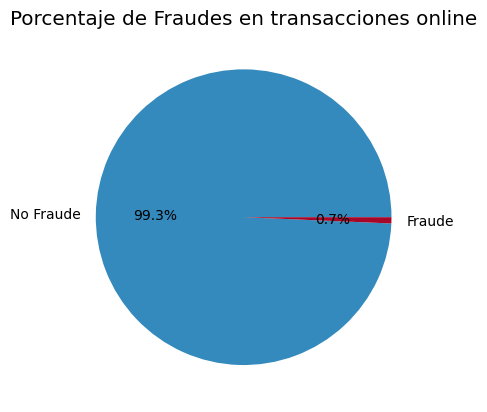

In [ ]:
count = df_cc.loc[df_cc["Use Chip"]=="Online Transaction"]["Is Fraud?"].value_counts()
count.index = count.index.map({True:"Fraude", False:"No Fraude"})
count.plot.pie(legend=False,ylabel="",title="Porcentaje de Fraudes en transacciones online", autopct="%1.1f%%")

### Tipo de Transacción según legitimidad:

Analizando los siguientes gráficos de torta en conjunto se ve que al filtrar la base de datos por transacciones fraudulentas, la proporción de transacciones online incrementa significativamente pasando de un 11% a un 62% lo que sugiere que las transacciones _online_ son un objetivo llamativo para el fraude de dinero.

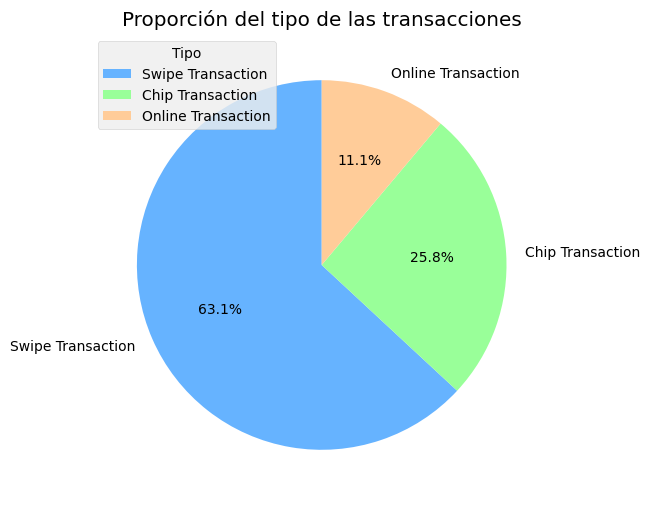

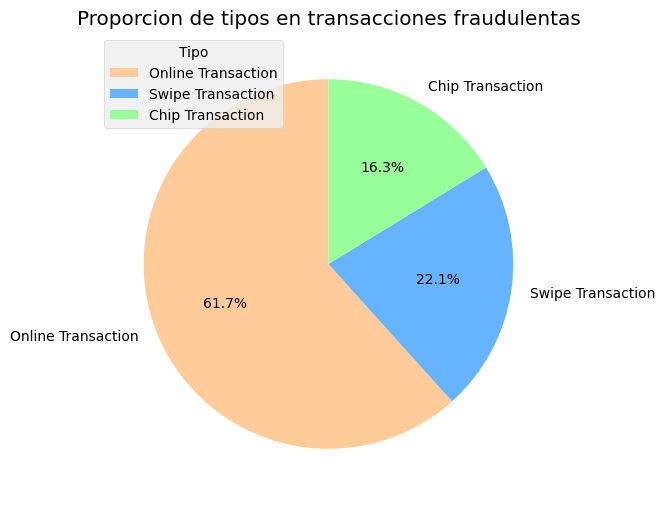

In [ ]:
# TODAS
df=df_cc
# Contar las ocurrencias de cada valor en la columna 'Use Chip'
use_chip_counts = df['Use Chip'].value_counts()
# Crear el gráfico de torta con tres colores
colors = ['#66b3ff', '#99ff99', '#ffcc99']
plt.figure(figsize=(6, 6))
plt.pie(use_chip_counts, labels=use_chip_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
# Añadir un título
plt.title('Proporción del tipo de las transacciones')
# Añadir la leyenda
plt.legend(title="Tipo", loc="upper left", labels=use_chip_counts.index)
# Mostrar el gráfico
plt.show()

# SOLO FRAUDE
# Contar las ocurrencias de cada valor en la columna 'Use Chip'
use_chip_counts = fraud_transactions['Use Chip'].value_counts()
# Crear el gráfico de torta con tres colores
colors = ['#ffcc99', '#66b3ff', '#99ff99']
plt.figure(figsize=(6, 6))
plt.pie(use_chip_counts, labels=use_chip_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
# Añadir un título
plt.title('Proporcion de tipos en transacciones fraudulentas')
# Añadir la leyenda
plt.legend(title="Tipo", loc="upper left", labels=use_chip_counts.index)
# Mostrar el gráfico
plt.show()

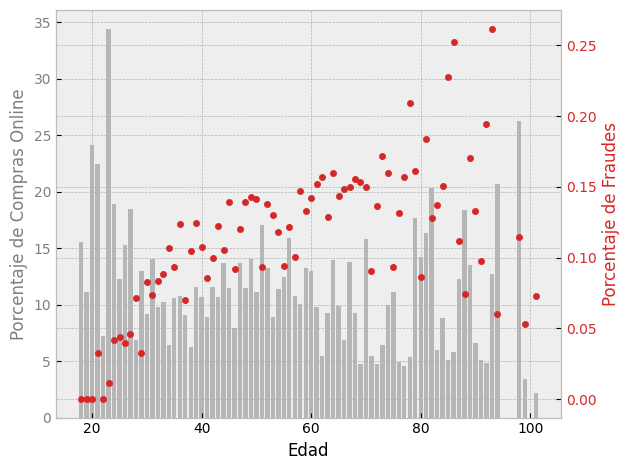

In [ ]:
df=df_cc
df_calc = df[["User", "Is Fraud?", "Use Chip"]].merge(df_users.rename_axis('User').reset_index()[["Current Age", "User"]], how="inner", on="User")
df_calc["Online"] = df_calc["Use Chip"].map({"Online Transaction": True, "Swipe Transaction": False, "Chip Transaction": False})

# Agrupar por edad y contar la cantidad total de transacciones totales, online y fraudes
df_calc = df_calc.groupby("Current Age").agg(
    Total=("Is Fraud?", "count"),
    Online=("Online", "sum"),
    Fraudes=("Is Fraud?", "sum")
).reset_index()
df_calc["Porcentaje_Fraudes"] = (df_calc["Fraudes"] / df_calc["Total"]) * 100
df_calc["Porcentaje_Online"] = (df_calc["Online"] / df_calc["Total"]) * 100

fig, ax2 = plt.subplots()

color = 'tab:gray'
ax2.set_xlabel('Edad')
ax2.set_ylabel('Porcentaje de Compras Online', color=color)  # we already handled the x-label with ax1
#ax2.bar(t, data2, color="gray", alpha=0.5, label="Compras Online", zorder=0)
bins = df_calc["Current Age"].max()-df_calc["Current Age"].min()
ax2.bar(df_calc["Current Age"],df_calc["Porcentaje_Online"], color="gray", alpha=0.5, label="Porcentaje Online", zorder=0)
ax2.tick_params(axis='y', labelcolor=color)

ax1 = ax2.twinx()  # inst

color = 'tab:red'
ax1.set_ylabel('Porcentaje de Fraudes', color=color)
ax1.scatter(df_calc["Current Age"], df_calc["Porcentaje_Fraudes"], color=color, label="Porcentaje Fraudes", s=20, zorder=10)
ax1.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Compras Online y procentaje de fraudes vs. Edad

En el siguiente gráfico podemos ver un histograma de compras online para distintas edades, junto con la distribución del porcentaje de fraudes para las mismas edades.
Podemos ver que en general a mayor edad, va aumentando el porcentaje de fraude, llegando a ser sobre 3% para personas de edades avanzadas.

## Preguntas y Problemas (Hito 1)

En el primer hito se plantearon las siguientes preguntas:

1. ¿Es posible predecir si una transacción dada es fraudulenta o no?
  1. ¿Existe un periodo de tiempo (hora, dia de la semana, mes) en el que sea más probable que ocurra un fraude?
  2. ¿Hay algún tipo de transacción más vulnerable a fraudes?
  3. ¿El uso de múltiples tarjetas por un consumidor aumenta el riesgo de fraude?
  4. ¿Influye el monto de la transacción en la probabilidad de ser fraude?
  5. ¿Las transacciones internacionales presentan un mayor riesgo en comparación con las nacionales?

2. ¿Qué tipo de persona es más probable que sufra este tipo de estafa?
    1. ¿Es la edad un factor de riesgo?
    2. ¿Hay más fraudes entre personas que usan menos transacciones _online_?

De estas, algunas se pueden responder simplemente con análisis estadístico de los datos, mientras que otras las intentamos profundizar un poco en este hito.

## Mas Exploración de Datos (Hito 2)
A continuación se presentan algunas mejoras y adiciones al trabajo realizado en el Hito 1

### Monto de Transacciones Fraudulentas

Primero, se grafican los montos de las transacciones fraudulentas y no fraudulentas

In [8]:
#Series(string(?)) a float la columna Amount
# cambiar la columna Is Fraud? a booleano
#y dejar solo las columnas Amount y Is Fraud?
#también se ordena por Amount
df_cc_sorted = df_cc[['Amount', 'Is Fraud?']].sort_values(by='Amount').copy().reset_index(drop=True)

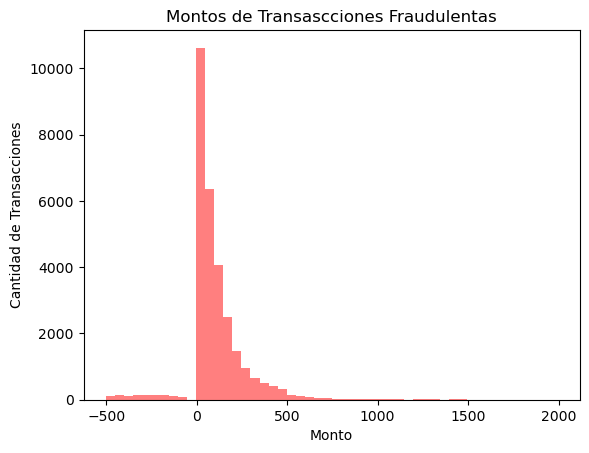

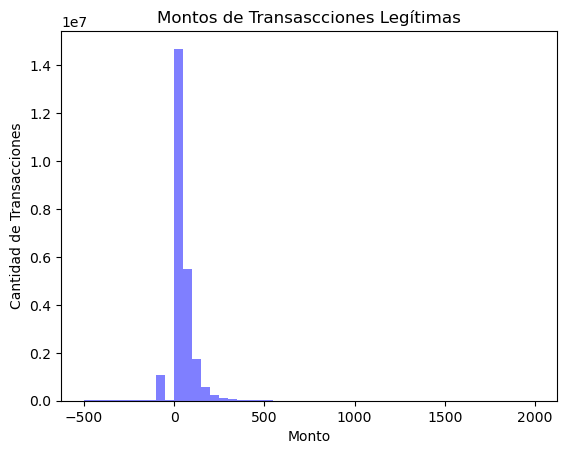

In [15]:
#solo se dejan fraudulentas
df_frauds = df_cc_sorted[df_cc_sorted['Is Fraud?'] == True]
df_not_fraud = df_cc_sorted[df_cc_sorted['Is Fraud?'] == False]
#se filtran menores a 2000 (outliers)
df_frauds.loc[:, 'Amount'] = df_frauds[df_frauds['Amount'] < 2000]
df_not_fraud.loc[:, 'Amount'] = df_not_fraud[df_not_fraud['Amount'] < 2000]

#se grafica
plt.hist(df_frauds['Amount'], bins=50, color='red', alpha=0.5)
plt.xlabel('Monto')
plt.ylabel('Cantidad de Transacciones')
plt.title('Montos de Transascciones Fraudulentas')
plt.show()

plt.hist(df_not_fraud['Amount'], bins=50, color='blue', alpha=0.5)
plt.xlabel('Monto')
plt.ylabel('Cantidad de Transacciones')
plt.title('Montos de Transascciones Legítimas')
plt.show()

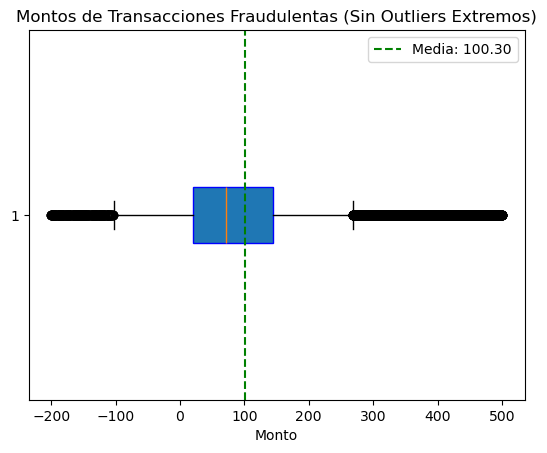

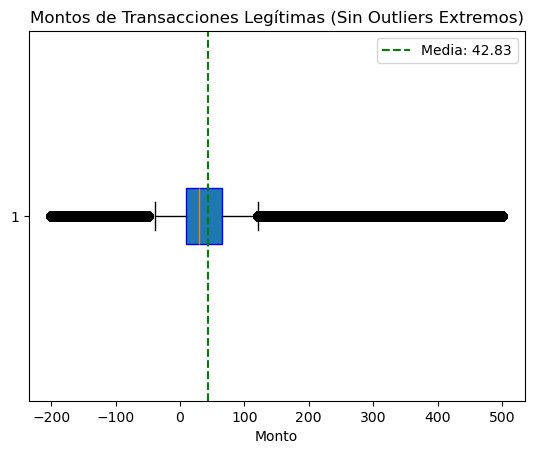

In [17]:
# Filtrar datos dentro de un rango de interés para reducir outliers visibles
filtered_frauds = df_frauds[(df_frauds['Amount'] >= -200) & (df_frauds['Amount'] <= 500)]
filtered_not_fraud = df_not_fraud[(df_not_fraud['Amount'] >= -200) & (df_not_fraud['Amount'] <= 500)]

# Crear el boxplot con límites y opciones ajustadas
plt.boxplot(filtered_frauds['Amount'], vert=False, patch_artist=True, whis=1.0, boxprops=dict(color="blue"))
# Etiquetas y título
plt.xlabel('Monto')
plt.title('Montos de Transacciones Fraudulentas (Sin Outliers Extremos)')
# Agregar línea para la media
mean_value = filtered_frauds['Amount'].mean()
plt.axvline(mean_value, color='green', linestyle='--', label=f'Media: {mean_value:.2f}')
plt.legend()
plt.show()

plt.boxplot(filtered_not_fraud['Amount'], vert=False, patch_artist=True, whis=1.0, boxprops=dict(color="blue"))
plt.xlabel('Monto')
plt.title('Montos de Transacciones Legítimas (Sin Outliers Extremos)')
mean_value = filtered_not_fraud['Amount'].mean()
plt.axvline(mean_value, color='green', linestyle='--', label=f'Media: {mean_value:.2f}')
plt.legend()
plt.show()

En los graficos obtenidos, se puede notar que en todas las transacciones predominan los montos relativamente bajos, pero en las fraudulentas tienden a ser un poco mas altos.

Es importante notar que los montos negativos corresponden a reembosos.

### Distribución de Fraudes en el Tiempo

Los siguientes gráficos muestran las distribuciones de las transacciones a lo largo de los años, según mes del año, según dia del mes y segun la hora del dia.

In [4]:
# Tabla con solo fechas/horas (y fraudes)
df_times = df_cc[['Year', 'Month', 'Day', 'Hour', 'Is Fraud?', 'Use Chip']]  #Tabla con fechas
df_frauds = df_times[df_times['Is Fraud?'] == True]
df_not_fraud = df_times[df_times['Is Fraud?'] == False]

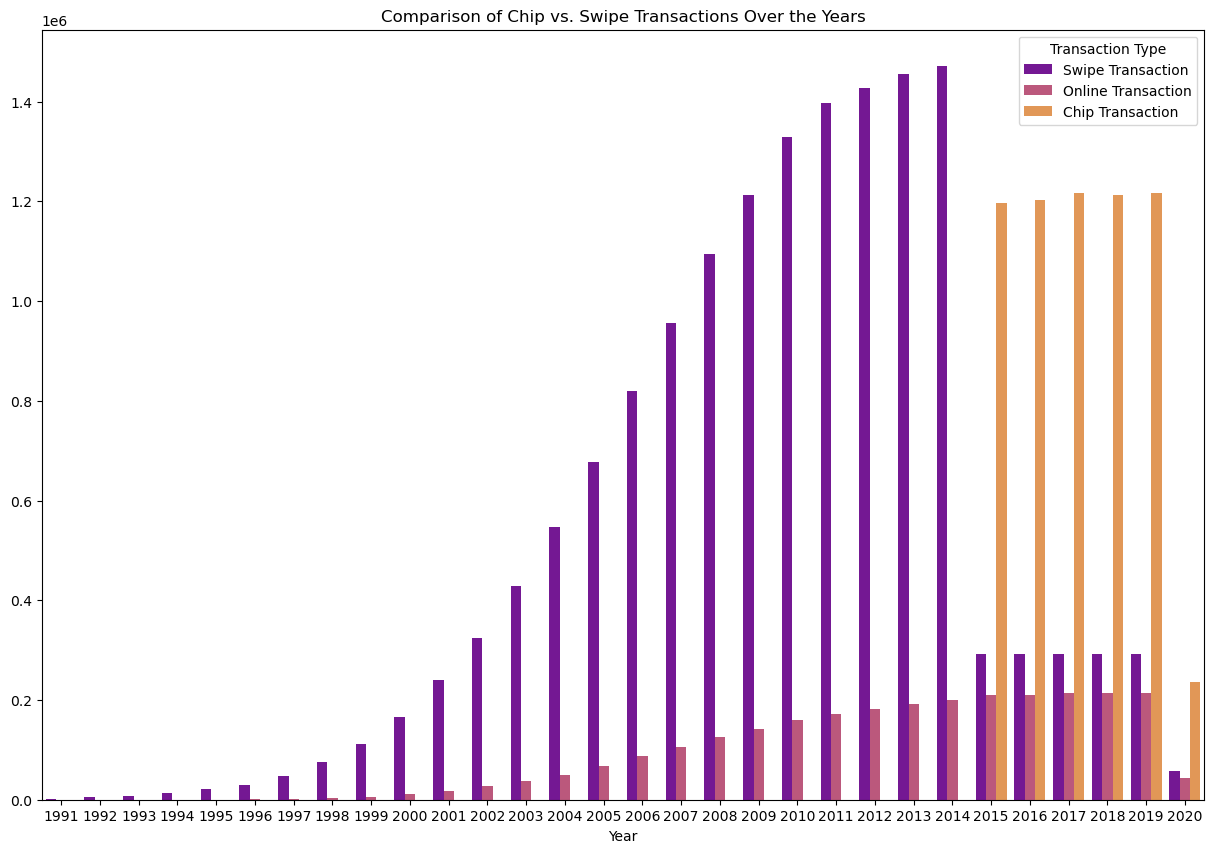

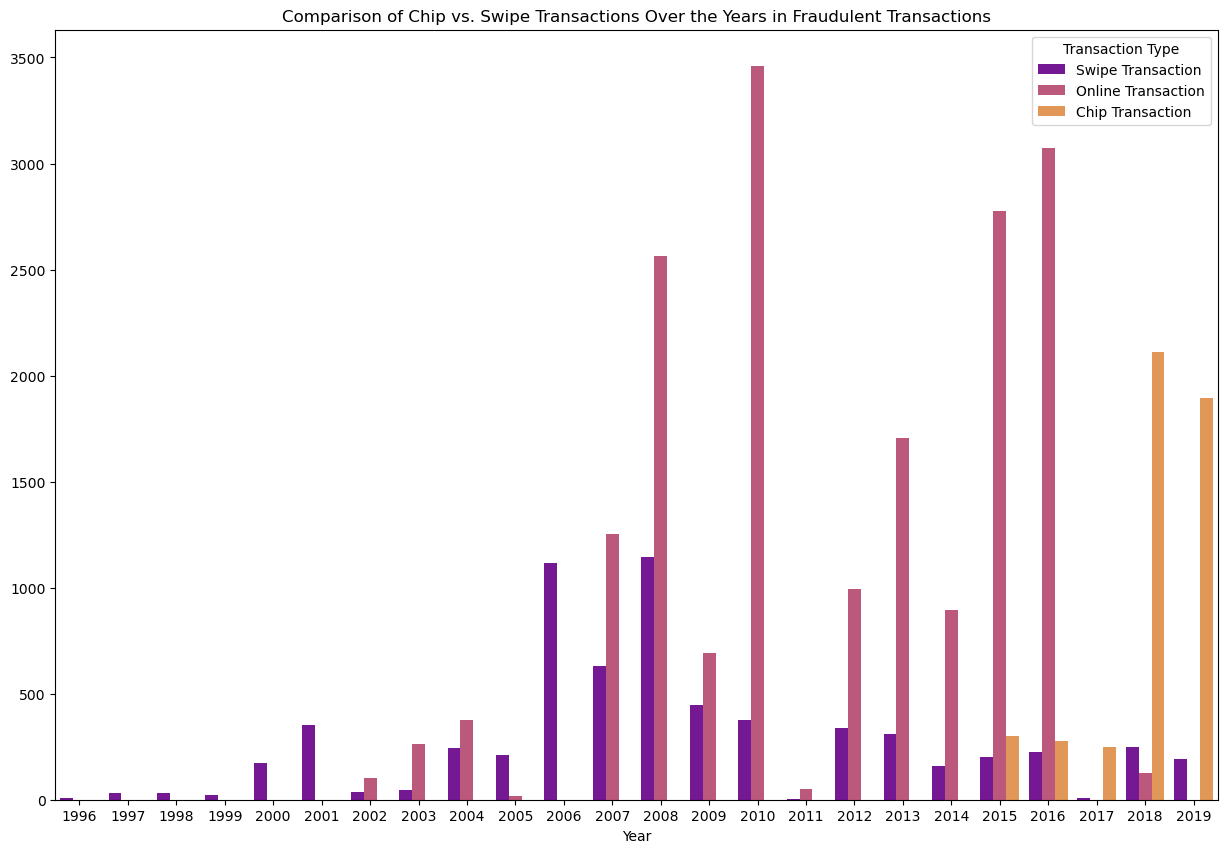

In [10]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df_not_fraud, x='Year', hue='Use Chip', palette='plasma')
plt.title('Comparison of Chip vs. Swipe Transactions Over the Years')
plt.legend(title='Transaction Type')
plt.ylabel('') # Ocultar el nombre del eje y
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=df_frauds, x='Year', hue='Use Chip', palette='plasma')
plt.title('Comparison of Chip vs. Swipe Transactions Over the Years in Fraudulent Transactions')
plt.legend(title='Transaction Type')
plt.ylabel('') # Ocultar el nombre del eje y
plt.show()

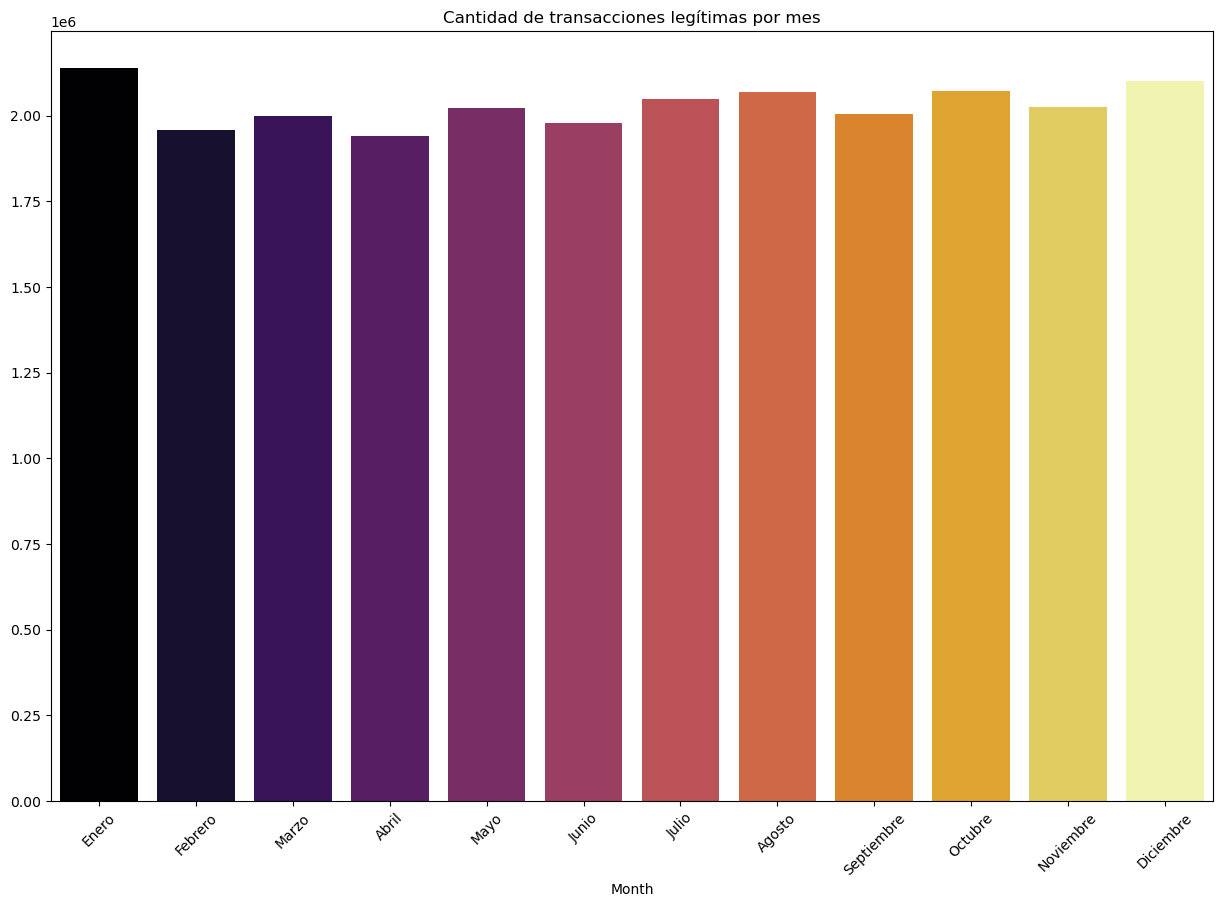

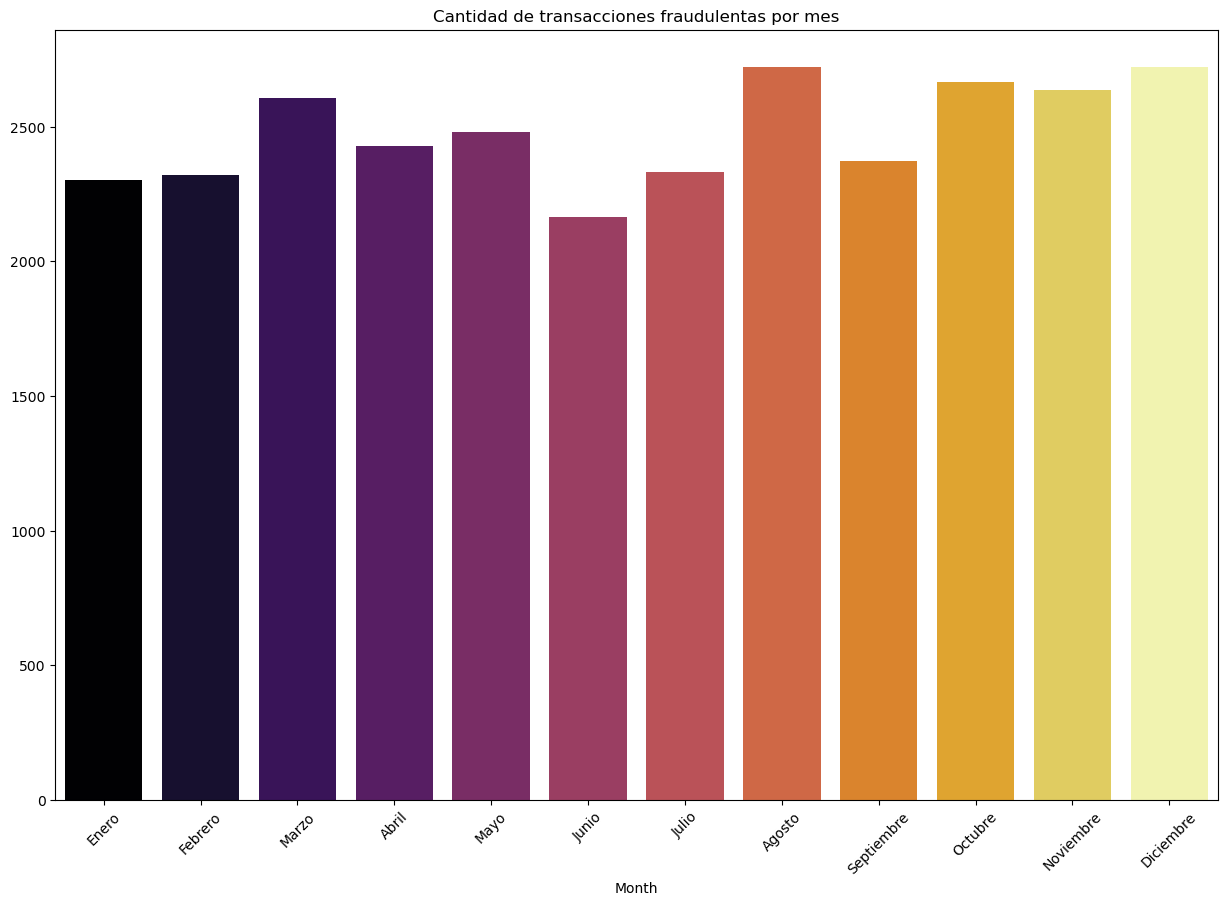

In [5]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df_not_fraud, x='Month', hue='Month', palette='inferno', legend=False)
month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
plt.title('Cantidad de transacciones legítimas por mes')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.ylabel('') # Ocultar el nombre del eje y
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=df_frauds, x='Month', hue='Month', palette='inferno', legend=False)
month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
plt.title('Cantidad de transacciones fraudulentas por mes')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.ylabel('') # Ocultar el nombre del eje y
plt.show()

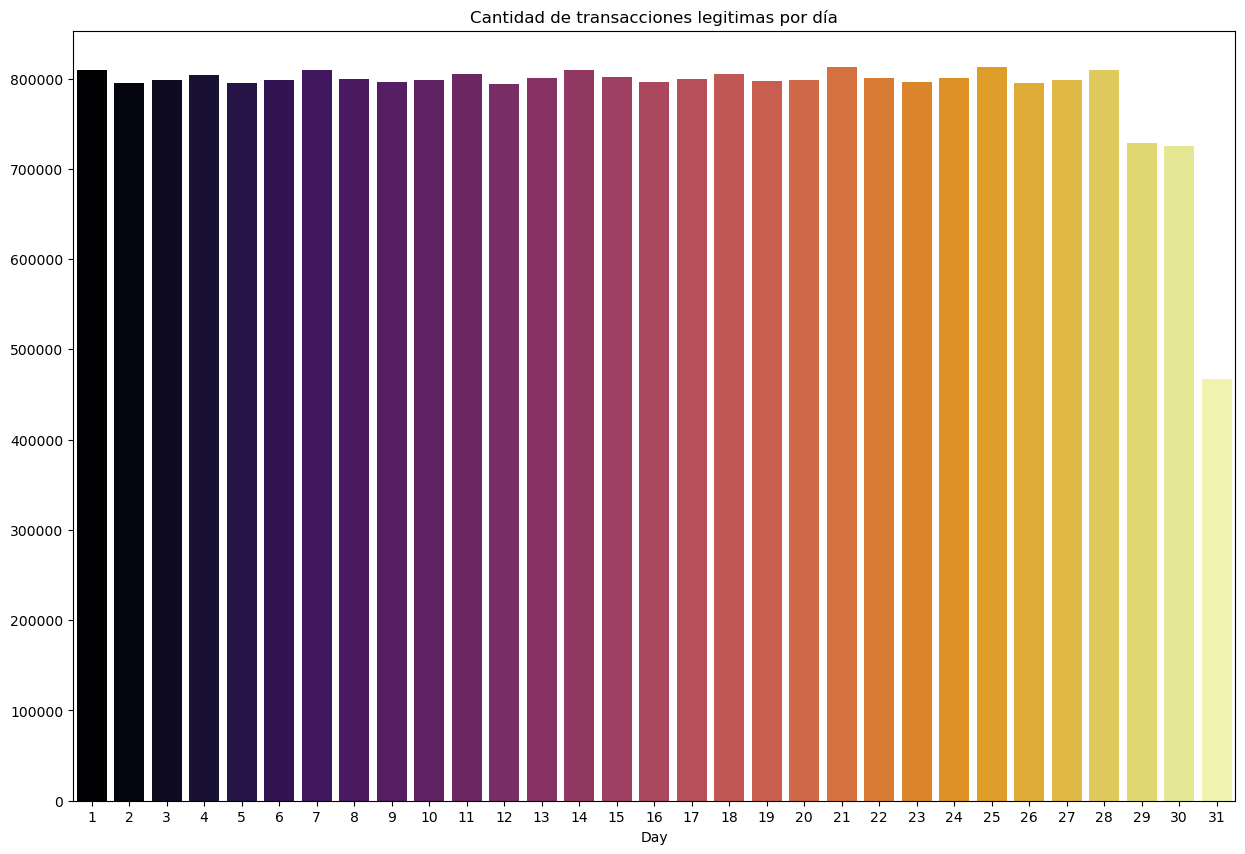

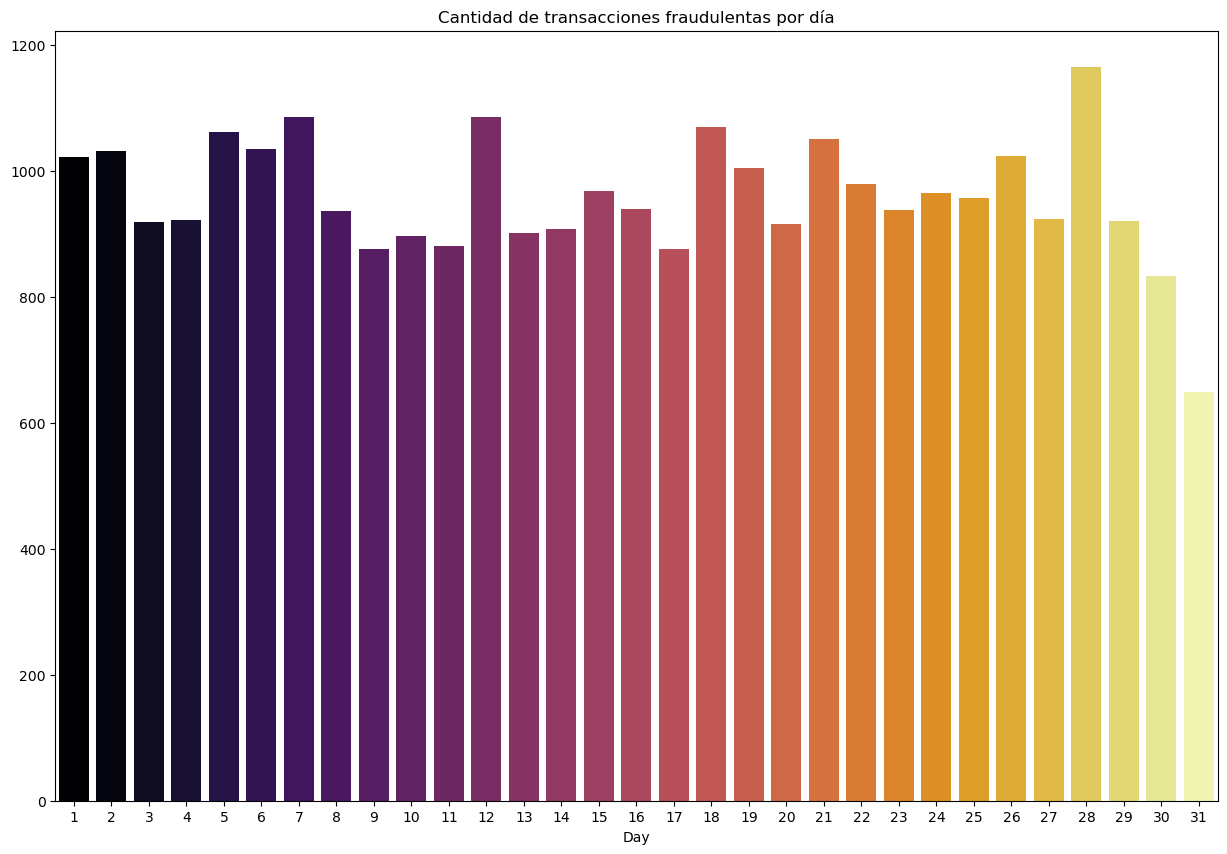

In [6]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df_not_fraud, x='Day', hue='Day', palette='inferno', legend=False)
plt.title('Cantidad de transacciones legitimas por día')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.ylabel('') # Ocultar el nombre del eje y
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=df_frauds, x='Day', hue='Day', palette='inferno', legend=False)
plt.title('Cantidad de transacciones fraudulentas por día')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.ylabel('') # Ocultar el nombre del eje y
plt.show()

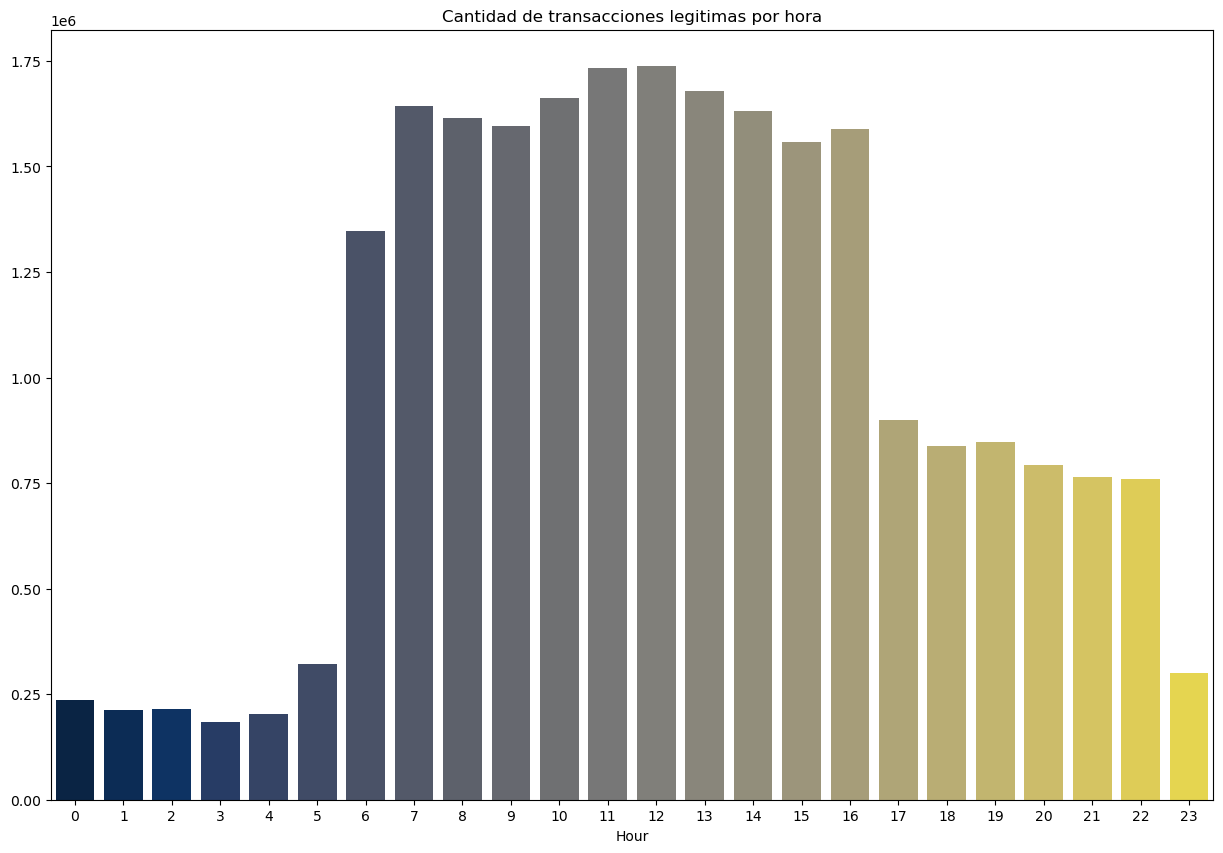

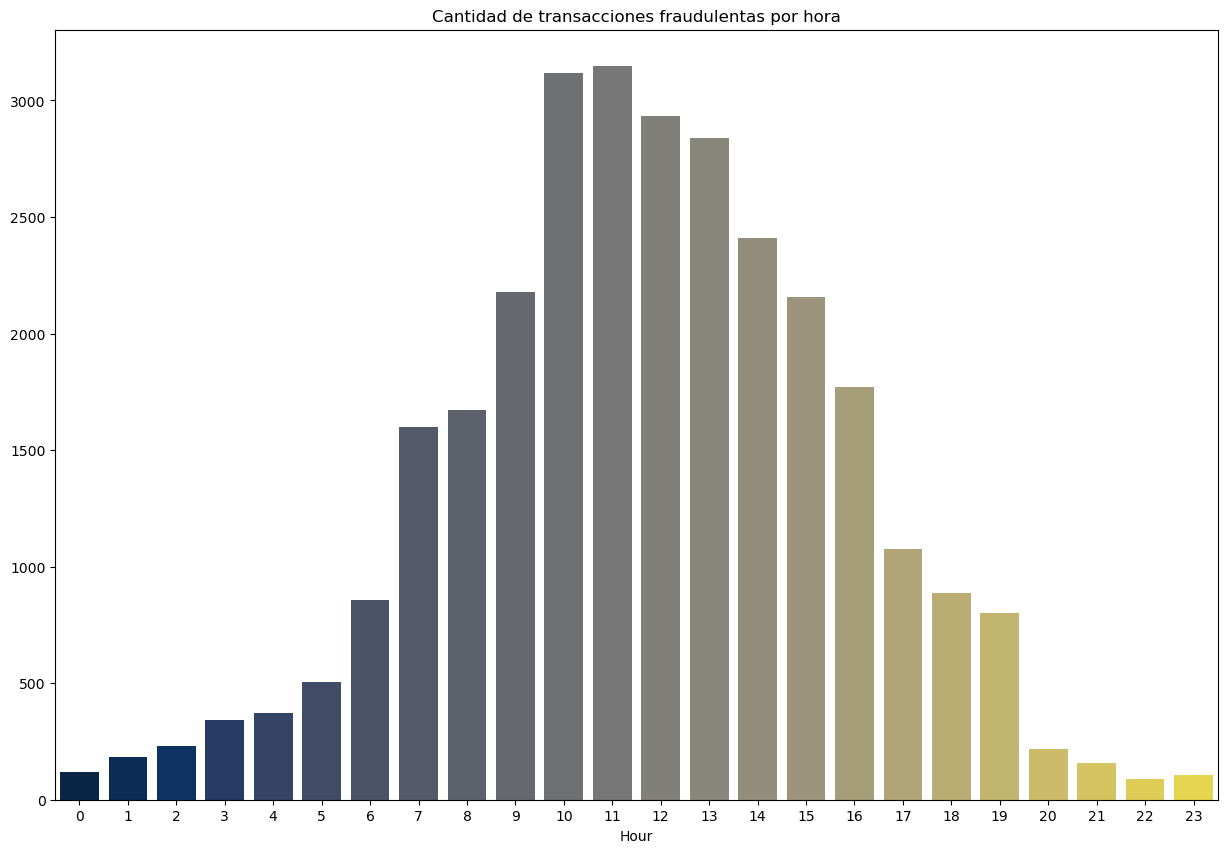

In [7]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df_not_fraud, x='Hour', hue='Hour', palette='cividis', legend=False)
plt.title('Cantidad de transacciones legitimas por hora')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.ylabel('') # Ocultar el nombre del eje y
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(data=df_frauds, x='Hour', hue='Hour', palette='cividis', legend=False)
plt.title('Cantidad de transacciones fraudulentas por hora')
plt.legend([],[], frameon=False)  # Ocultar la leyenda
plt.ylabel('') # Ocultar el nombre del eje y
plt.show()

Se puede observar que las distribucones son distintas para transacciones legítimas y fraudulentas, en todas las medidas de tiempo.

Los datos del año 2020 están incompletos, comprende solo los primeros 2 meses del año.

### Lugares de Transferencias

Mediante los siguientes gráficos se estudia si el lugar donde se hacen las transferencias influye en los fraudes

In [14]:
df_frauds = df_cc[df_cc['Is Fraud?'] == True]
df_not_fraud = df_cc[df_cc['Is Fraud?'] == False]

df_ciudades_frauds = df_frauds.groupby('Merchant City')["Is Fraud?"].count().sort_values(ascending=False)
df_ciudades_not_fraud = df_not_fraud.groupby('Merchant City')["Is Fraud?"].count().sort_values(ascending=False)

df_ciudades_frauds = df_ciudades_frauds.iloc[1:]  # Eliminar Online
df_ciudades_not_fraud = df_ciudades_not_fraud.iloc[1:]  # Eliminar Online

top_20_ciudades_f = df_ciudades_frauds.head(20)
top_20_ciudades_nf = df_ciudades_not_fraud.head(20)

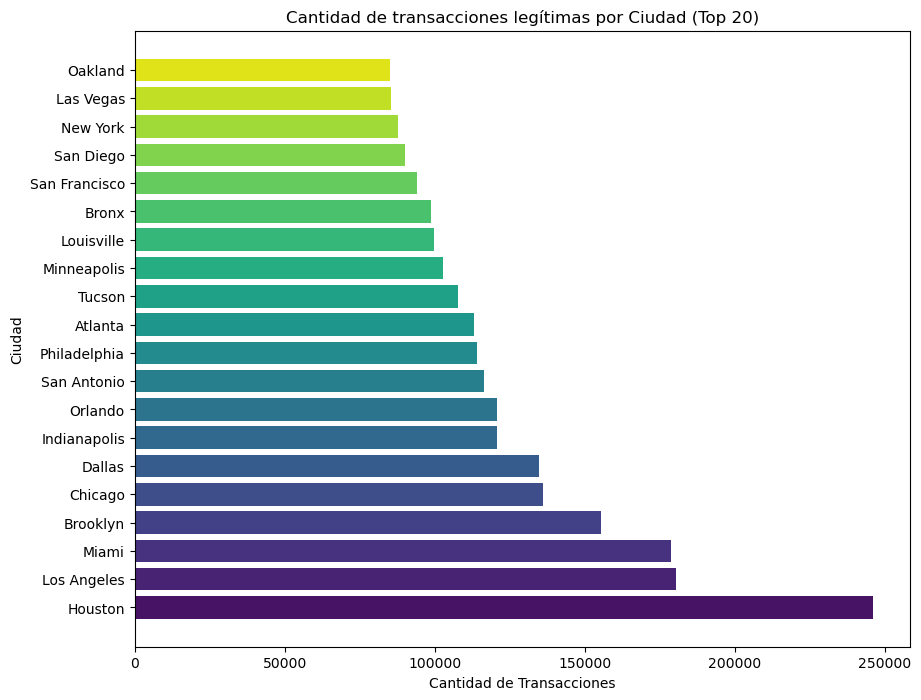

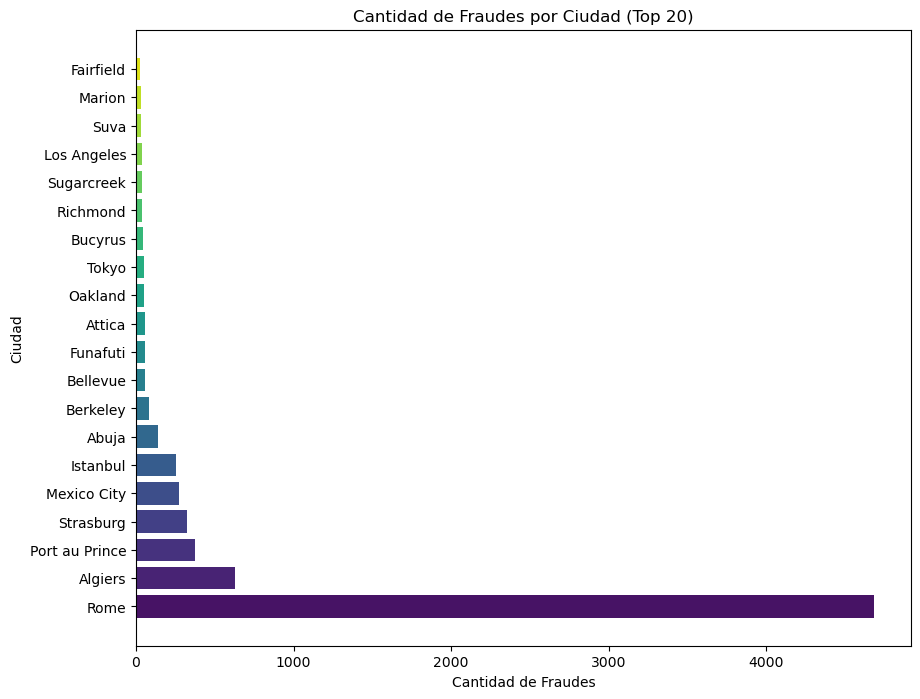

In [15]:
plt.figure(figsize=(10, 8))
bars = plt.barh(top_20_ciudades_nf.index, top_20_ciudades_nf.values, color=sns.color_palette('viridis', 20))
plt.xlabel('Cantidad de Transacciones')
plt.ylabel('Ciudad')
plt.title('Cantidad de transacciones legítimas por Ciudad (Top 20)')

plt.show()

plt.figure(figsize=(10, 8))
bars = plt.barh(top_20_ciudades_f.index, top_20_ciudades_f.values, color=sns.color_palette('viridis', 20))
plt.xlabel('Cantidad de Fraudes')
plt.ylabel('Ciudad')
plt.title('Cantidad de Fraudes por Ciudad (Top 20)')

plt.show()

In [16]:
df_estados_frauds = df_frauds.groupby('Merchant State')["Is Fraud?"].count().sort_values(ascending=False)
df_estados_not_fraud = df_not_fraud.groupby('Merchant State')["Is Fraud?"].count().sort_values(ascending=False)

top_20_estados_f = df_estados_frauds.head(20)
top_20_estados_nf = df_estados_not_fraud.head(20)

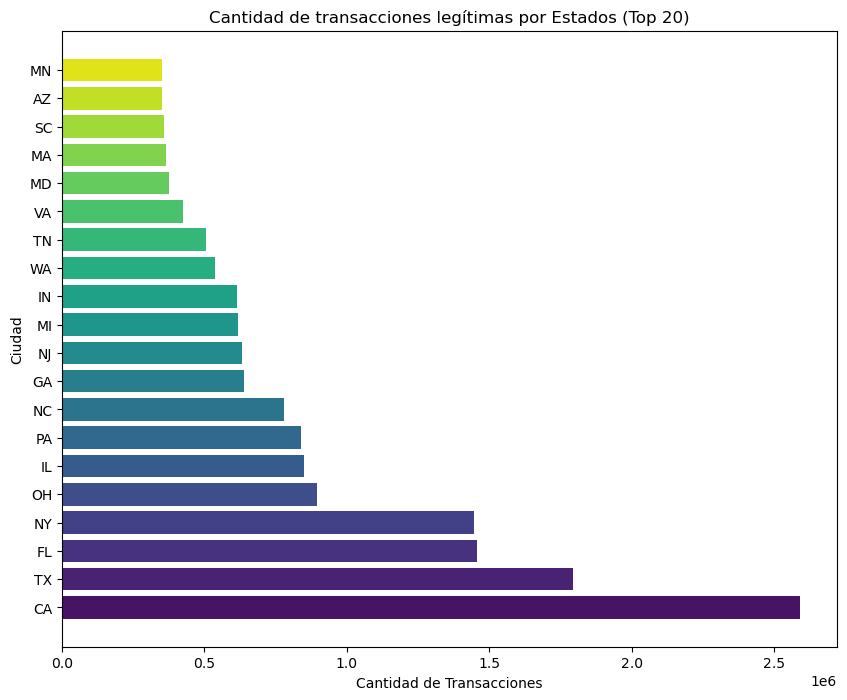

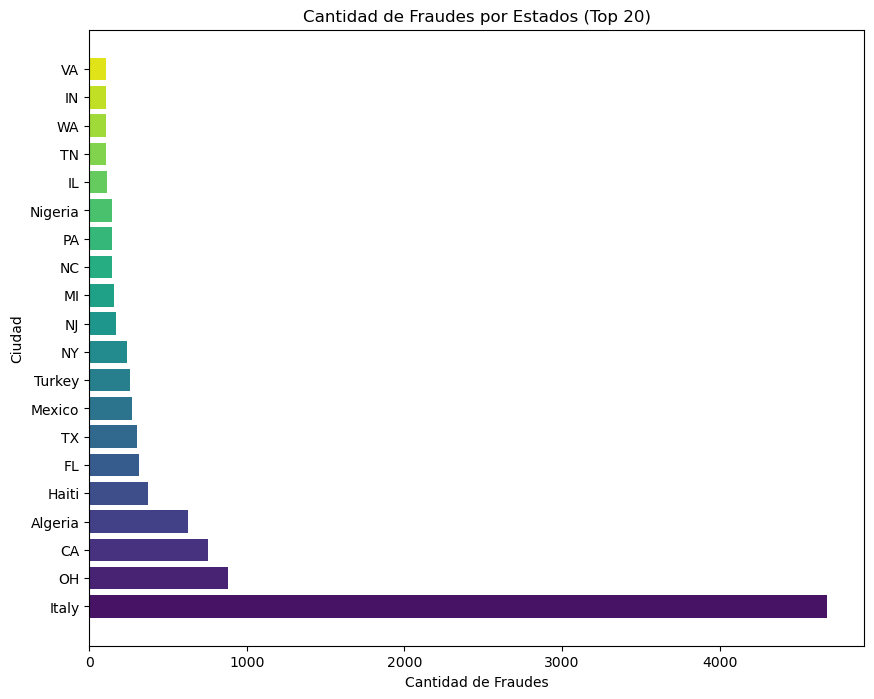

In [17]:
plt.figure(figsize=(10, 8))
bars = plt.barh(top_20_estados_nf.index, top_20_estados_nf.values, color=sns.color_palette('viridis', 20))
plt.xlabel('Cantidad de Transacciones')
plt.ylabel('Ciudad')
plt.title('Cantidad de transacciones legítimas por Estados (Top 20)')

plt.show()

plt.figure(figsize=(10, 8))
bars = plt.barh(top_20_estados_f.index, top_20_estados_f.values, color=sns.color_palette('viridis', 20))
plt.xlabel('Cantidad de Fraudes')
plt.ylabel('Ciudad')
plt.title('Cantidad de Fraudes por Estados (Top 20)')

plt.show()

Efectivamente, hay diferencias entre los lugares con mas transacciones frautulentas y los con mas transacciones legítimas. LLama la atencion la cantidad de fraudes en roma, mucho mayor a otras ciudades.

### Con chip vs sin chip

Finalmente, se muestra que hay mas fraudes en tarjetas sin chip que en tarjetas con chip. Se considera solo a partir del año 2015, pues antes no hay ninguna tarjeta con chip.

In [21]:
df_cards_chikita = df_cards[['User', 'CARD INDEX', 'Year PIN last Changed', 'Card on Dark Web', 'Has Chip']].copy()
df_cards_chikita['Card on Dark Web'] = df_cards_chikita['Card on Dark Web'].map({"No": False, "Yes": True})
df_cards_chikita['Has Chip'] = df_cards_chikita['Has Chip'].map({"NO": False, "YES": True})


df_cc_chikito = df_cc[['User', 'Card', 'Year', 'Is Fraud?']]

df_cc_cards = df_cc_chikito.merge(df_cards_chikita, how='inner', left_on=['User', 'Card'], right_on=['User', 'CARD INDEX'])

Has Chip
False    0.138912
True     0.198855
Name: Is Fraud?, dtype: float64


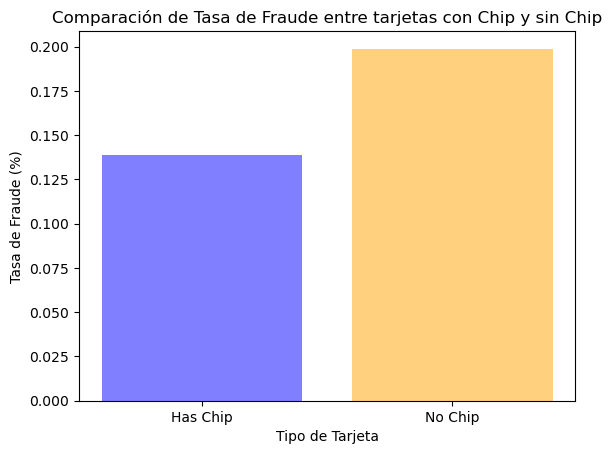

In [22]:
# Calcular la tasa de fraude para tarjetas con chip y sin chip desde el añ0 2015
fraud_rate_chip = df_cc_cards[df_cc_cards['Year'] == 2015].groupby('Has Chip')['Is Fraud?'].mean() * 100

# Mostrar la tasa de fraude para cada tipo de tarjeta
print(fraud_rate_chip)

# Crear el gráfico de barras
plt.bar(['Has Chip', 'No Chip'], fraud_rate_chip, color=['blue', 'orange'], alpha=0.5)
plt.xlabel('Tipo de Tarjeta')
plt.ylabel('Tasa de Fraude (%)')
plt.title('Comparación de Tasa de Fraude entre tarjetas con Chip y sin Chip')
plt.show()

## Preguntas a Investigar



## Propuesta Experimental

Se realizará una exploración inicial de datos para identificar características relevantes, generando gráficos que muestren el porcentaje de transacciones fraudulentas en todas las transacciones y específicamente en las online, la distribución de fraudes en el tiempo, los montos más comunes en transacciones fraudulentas y la relación entre la edad del usuario y su probabilidad de fraude en compras online.

### Predicción

El enfoque predictivo se centrará en el modelo de Random Forest, que permitirá estimar la probabilidad de fraude en transacciones nuevas. Las métricas de evaluación empleadas para analizar el rendimiento serán precisión, recall y F1 score, asegurando una comprensión completa del desempeño en ambos tipos de transacciones.

Dado que el dataset es suficientemente grande, se aplicará undersampling para equilibrar las clases y reducir el tiempo de ejecución, eliminando parte de la clase mayoritaria (transacciones legítimas). Además, se depurarán columnas con valores nulos o datos irrelevantes para el análisis.

### Clustering

También aplicaremos técnicas de clustering para encontrar de manera natural si las características de nuestro dataset son suficientes para encontrar grupos de transacciones similares

Probaremos múltiples combinaciones en el número de clúster así como distintos enfoques de clustering (particional y jerárquico). Ocuparemos P y Q heurísticas/técnicas para estimar los mejores parámetros de los distintos modelos.

También probaremos usando distintos subconjuntos de atributos al hacer clustering para evaluar si los ejemplos se agrupan de manera distinta cuando consideramos información diferente. 

Para evaluar los clusters, utilizaremos el enfoque visual así como también la estimación de métricas tales como cohesión y separación. 



## Experimentos Preeliminares

### Selección de columnas

Se clasificó una muestra reducida de 1.000.000 transacciones utilizando un RantomForestClassifier, para probar el comportamiento del modelo sobre nuestros datos. La muestra resulto tener proporcionalmente mas fraudes que el total, aprox. 1% de fraudes

Se utilizaron solamente algunas columnas de los datos:
- Si es la 1ª, 2ª, 3ª, etc tarjeta del titular
- La hora de la transacción
- El monto
- Si la transacción es por chip, deslizando, u online
- El nombre, MCC y código postal del vendedor
- La edad de jubilación del titular
- El año de nacimiento del titular
- El código postal del titular
- El ingreso per cápita del hogar del titular
- El ingreso anual del titular
- La deuda del titular
- El score de crédito del titular
- La cantidad de tarjetas de crédito que posee

Esto nos dio un recall de 0.67, que nos pareció bastante razonable,


In [ ]:
# Construccion de un modelo de clasificación
from sklearn.model_selection import train_test_split

df_model = df_gigante.head(1000000)

X = df_model.drop(columns=['Is Fraud?', 'User', 'Address', 'Latitude', 'Longitude', 'Errors?', 'Person', 'Apartment', 'City', 'State', 'Merchant City', 'Merchant State', 'Year', 'Day', 'Current Age', 'Gender', 'Birth Month'])
chip_mapping = {
    "Swipe Transaction": 0,
    "Chip Transaction": 1,
    "Online Transaction": 2
}
X["Use Chip"] =  X['Use Chip'].replace(chip_mapping).astype(int) # chip como int
X['Per Capita Income - Zipcode'] = X['Per Capita Income - Zipcode'].str.replace('$', '').astype(int)
X['Yearly Income - Person'] = X['Yearly Income - Person'].str.replace('$', '').astype(int)
X['Total Debt'] = X['Total Debt'].str.replace('$', '').astype(float)

y = df_model['Is Fraud?']

# Primero separamos los datos de entrenamiento y validación/test
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Luego separamos los datos de validación y pruebas                                       0.5 x 0.3 = 0.15
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=0, stratify=y_val_and_test)

/tmp/nix-shell.U18pIZ/ipykernel_768408/2402371661.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["Use Chip"] =  X['Use Chip'].replace(chip_mapping).astype(int) # chip como int


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

clf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=0, n_estimators=10))
])

# Notemos que al usar el pipeline, no necesitamos escalar los datos manualmente
# ya que el pipeline se encarga de hacerlo al correr el método fit, predict, etc.
clf_pipeline.fit(X_train, y_train)

y_pred = clf_pipeline.predict(X_test)

print("RandomForestClassifier sobre las primeras 1.000.000 transacciones")
print("Estimators: 10")
print(classification_report(y_test, y_pred))

RandomForestClassifier sobre las primeras 1.000.000 transacciones
Estimators: 10
Weights: 0.001, 0.999
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    149851
        True       1.00      0.34      0.50       149

    accuracy                           1.00    150000
   macro avg       1.00      0.67      0.75    150000
weighted avg       1.00      1.00      1.00    150000



### Subsampling

Además, se entrenó un RandomForestClassifier con una muestra reducida de los datos mediante subsampling, manteniendo los 29.000 fraudes como parte de sus datos de entrenamineto/testing.

Decidimos utilizar undersampling porque como tenemos una gran cantidad de datos, el costo de utilizarlos todos es muy grande.
Sin embargo, esto trae algunas limitaciones:
- Puede llevar a pérdida de información de la nuestra mayoritaria, al eliminar datos.
- Puede reducir el _accuracy_ y el _recall_ de la clase mayoritaria, ya que representa menos ejemplos de esta.

Esto resultó en un _recall_ mucho mayor (~0.9), pero una presición mucho menor (~0.01).

In [ ]:
# Construccion de un modelo de clasificación
from sklearn.model_selection import train_test_split

df_model = df_gigante

X = df_model.drop(columns=['Is Fraud?', 'User', 'Address', 'Latitude', 'Longitude', 'Errors?', 'Person', 'Apartment', 'City', 'State', 'Merchant City', 'Merchant State', 'Use Chip', 'Gender', 'Per Capita Income - Zipcode', 'Yearly Income - Person', 'Total Debt', 'Zip'])
y = df_model['Is Fraud?']

# Primero separamos los datos de entrenamiento y validación/test
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Luego separamos los datos de validación y pruebas                                       0.5 x 0.3 = 0.15
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=0, stratify=y_val_and_test)



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler  # Importa el RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

# Aplica undersampling SOLO en los datos de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# Entrena el modelo con el conjunto de datos balanceado
modelo_under = RandomForestClassifier(random_state=42, n_estimators=50)
modelo_under.fit(X_train_balanced, y_train_balanced)

# Realiza predicciones en el conjunto de prueba (sin balancear)
y_predunder = modelo_under.predict(X_test)

# Calcula las métricas
accuracy = accuracy_score(y_test, y_predunder)
precision = precision_score(y_test, y_predunder)
recall = recall_score(y_test, y_predunder)
f1 = f1_score(y_test, y_predunder)

print("Métricas de Evaluación en el Conjunto de Prueba (Undersampling):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Métricas de Evaluación en el Conjunto de Prueba (Undersampling):
Accuracy: 0.9431
Precision: 0.0190
Recall: 0.9005
F1 Score: 0.0372


#### Importancia de las Columnas

Este modelo nos permitió ademas ver qué columnas considera más "importantes" en su clasificación.

Resultó en que las tres columnas más importantes son:
1. Hora de la trasnsacción
2. Número (identificación) del vendedor
3. Día del mes de la transacción

In [ ]:
nombres_atributos = [f"Atributo {i}" for i in range(X.shape[1])]

#rf = RandomForestClassifier(n_estimators=10, random_state=42)
#rf.fit(X, y)

importancia = modelo_under.feature_importances_

df_importancia = pd.DataFrame({
    'Atributo': nombres_atributos,
    'Importancia': importancia
}).sort_values(by='Importancia', ascending=False)

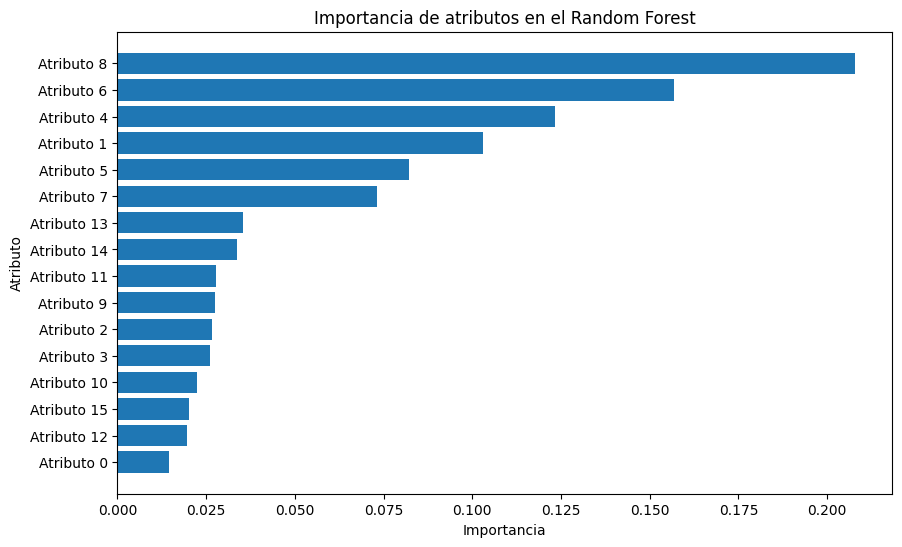

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(df_importancia['Atributo'], df_importancia['Importancia'])
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.xlabel("Importancia")
plt.ylabel("Atributo")
plt.title("Importancia de atributos en el Random Forest")
plt.show()


In [ ]:
# Hour
columna_8 = X.iloc[:, 8 - 1]
columna_8

0            6
1            6
2            6
3           17
4            6
            ..
24386895    22
24386896    22
24386897     7
24386898    20
24386899    23
Name: Hour, Length: 24386900, dtype: int64

In [ ]:
# Merchant Name
columna_6 = X.iloc[:, 6 - 1]
columna_6

0           3527213246127876953
1           -727612092139916043
2           -727612092139916043
3           3414527459579106770
4           5817218446178736267
                   ...         
24386895   -5162038175624867091
24386896   -5162038175624867091
24386897    2500998799892805156
24386898    2500998799892805156
24386899    4751695835751691036
Name: Merchant Name, Length: 24386900, dtype: int64

In [ ]:
# Merchant Name
columna_4 = X.iloc[:, 4 - 1]
columna_4

0            1
1            1
2            2
3            2
4            3
            ..
24386895    27
24386896    27
24386897    28
24386898    28
24386899    28
Name: Day, Length: 24386900, dtype: int64

# Contribuciones

**Exploración de datos y gráficos:** Felipe Cardenas \
**Selección de Modelos y Experimentos Preeliminares:** Alejandra Campos Urbina, Sofia Araya \
**Redaccion informe:** Bastian Araneda, Ian Armstrong, Alejandra Campos Urbina \
**Elaboracion presentacion:** Sofia Araya, Bastian Araneda \
**Presentacion presencial del hito:** Ian Armstrong y Bastian Araneda
